In [ ]:
                                                  RANDOM FOREST ASSIGNMENT

In [3]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

file_path = "glass.xlsx"   
description = pd.read_excel(file_path, sheet_name="Description")
glass_data = pd.read_excel(file_path, sheet_name="glass")

print("Description sheet:\n", description.head(), "\n")
print("glass Data:\n", glass_data.head(), "\n")


Description sheet:
   Prepare a model for glass classification using Random Forest
0                                  Data Description:          
1                              RI : refractive index          
2  Na: Sodium (unit measurement: weight percent i...          
3                                      Mg: Magnesium          
4                                       AI: Aluminum           

glass Data:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1 



In [4]:
# 3. EDA
print("\nDataset Info:")
print(glass_data.info())

print("\nMissing Values:\n", glass_data.isnull().sum())
print("\nClass Distribution:")
print(glass_data["Type"].value_counts())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

Missing Values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Class Distribution:
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [13]:
 #Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
glass_data['Type'] = glass_data['Type'].astype(str)

#  feature colu
features = [c for c in glass_data.columns if c != 'Type']

# Quick check: skewness 
print("Skewness of features:")
print(glass_data[features].skew().sort_values(ascending=False))
print("\n")

Skewness of features:
K     6.551648
Ba    3.416425
Ca    2.047054
Fe    1.754327
RI    1.625431
Al    0.907290
Na    0.454181
Si   -0.730447
Mg   -1.152559
dtype: float64




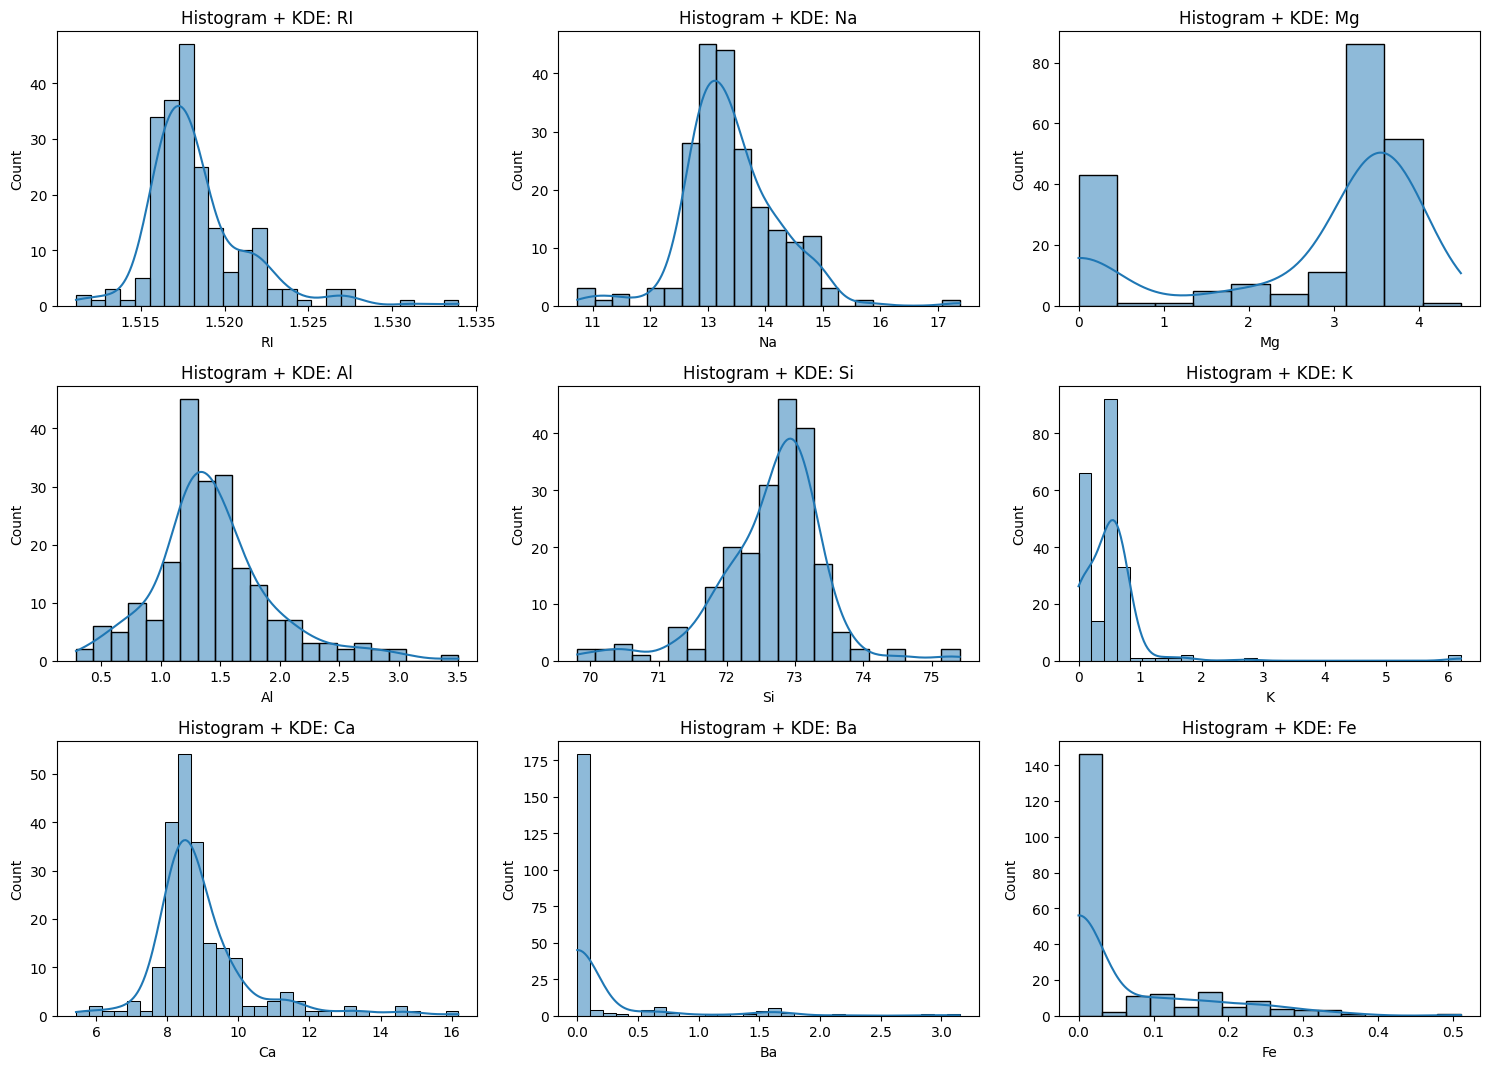

In [14]:
# 1) Histograms 
n = len(features)
cols = 3
rows = (n + cols - 1) // cols
plt.figure(figsize=(cols * 5, rows * 3.6))
for i, col in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(glass_data[col], kde=True)
    plt.xlabel(col)
    plt.title(f'Histogram + KDE: {col}')
plt.tight_layout()
plt.show()

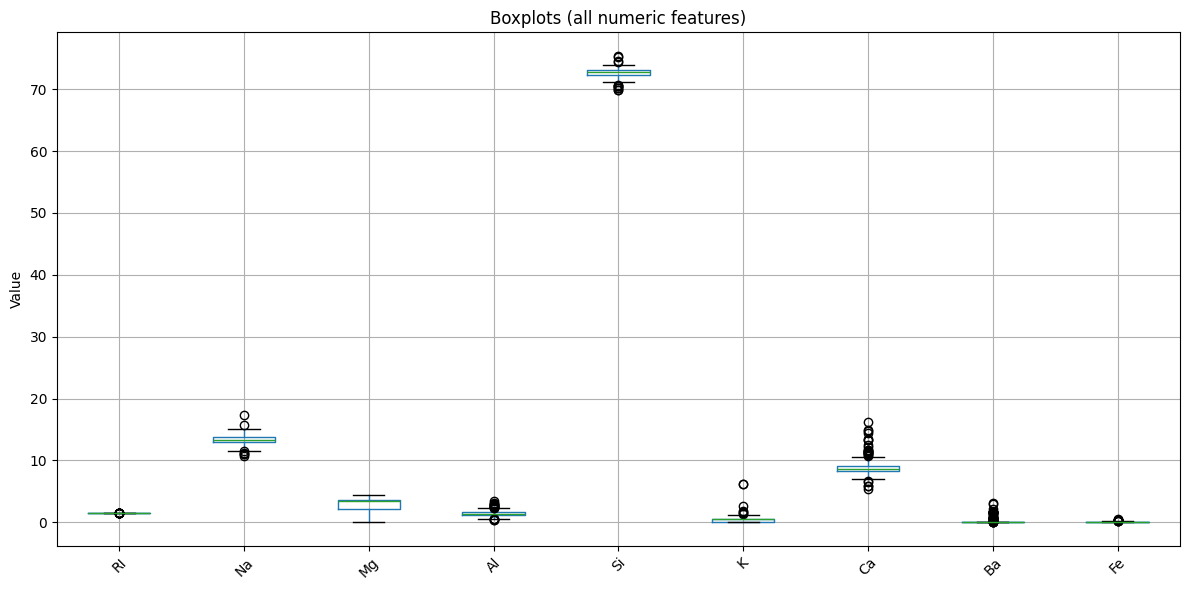

In [15]:
#  Boxplots for all features 
plt.figure(figsize=(12,6))
glass_data[features].boxplot(rot=45)
plt.title("Boxplots (all numeric features)")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

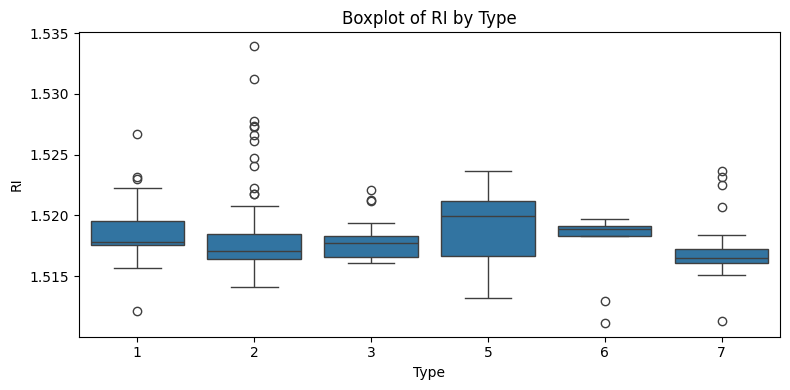

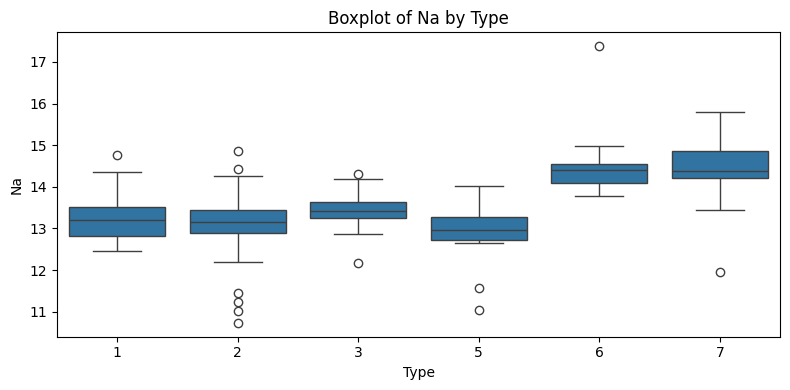

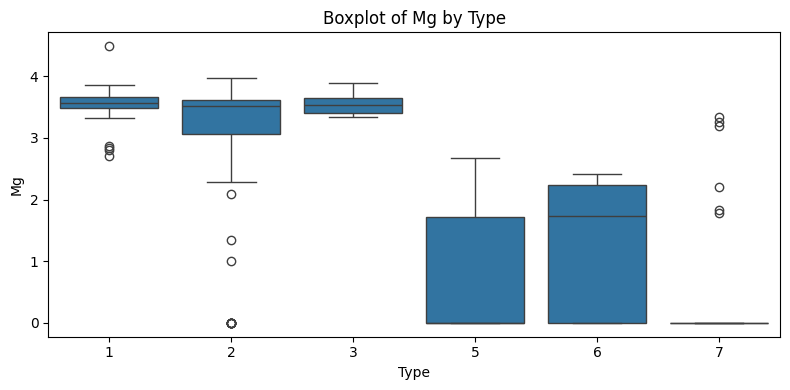

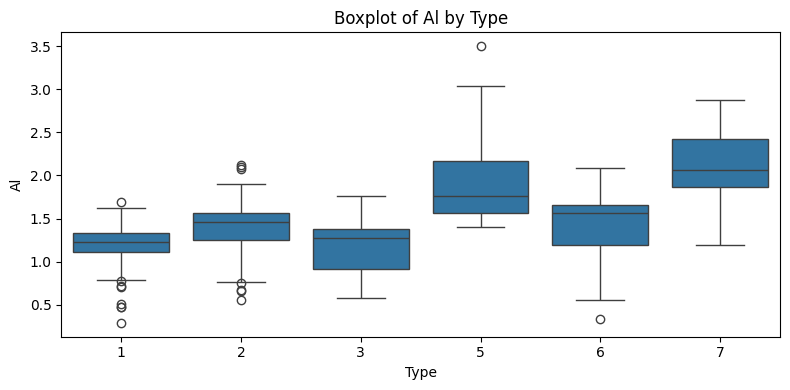

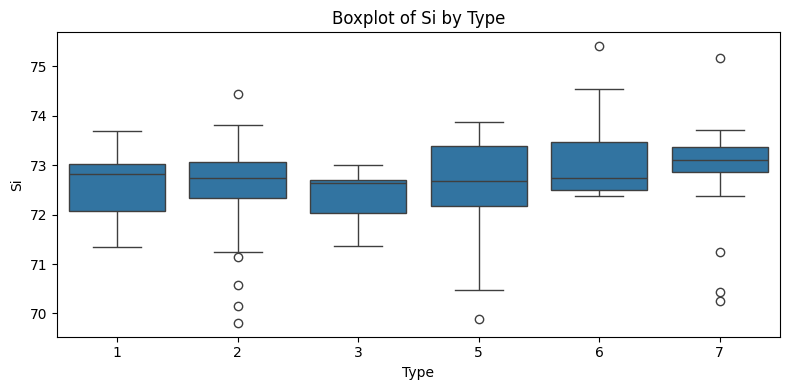

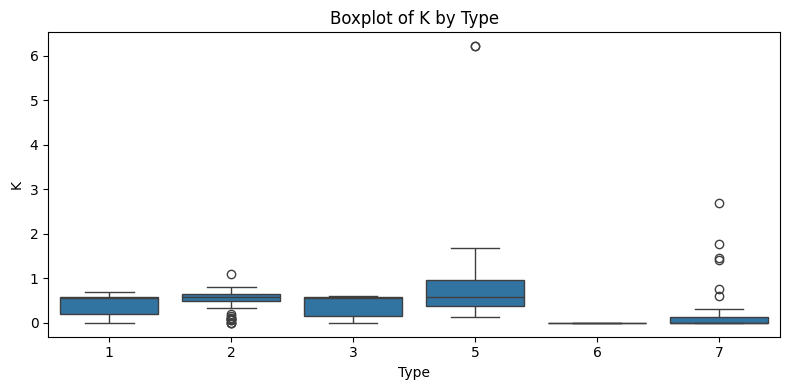

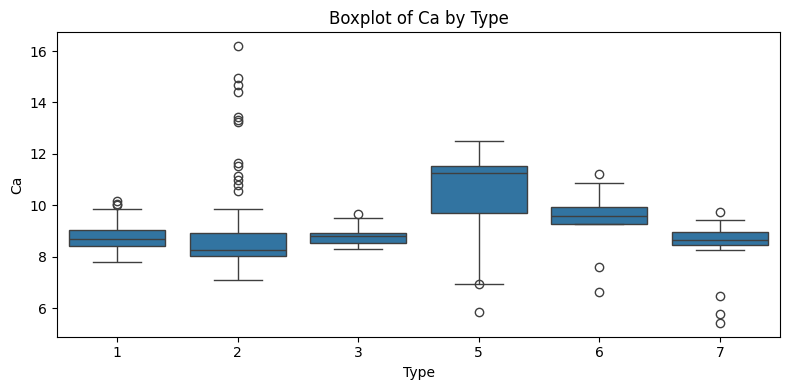

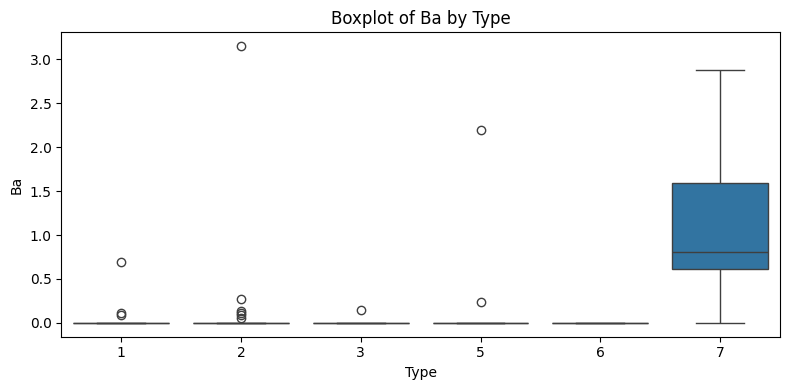

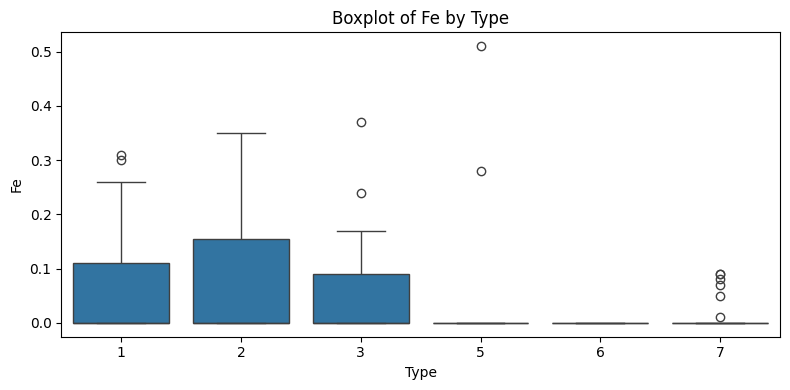

In [16]:
 # Boxplot of each feature
for col in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Type', y=col, data=glass_data)
    plt.title(f'Boxplot of {col} by Type')
    plt.xlabel("Type")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


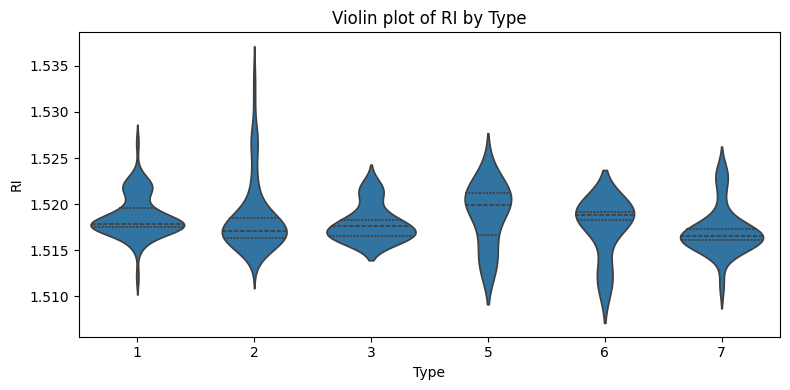

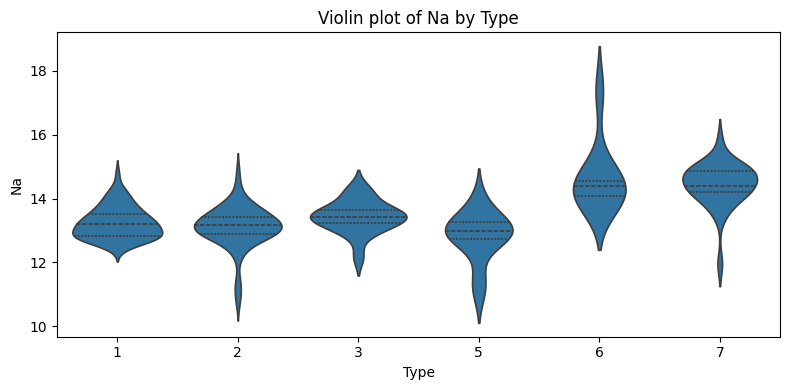

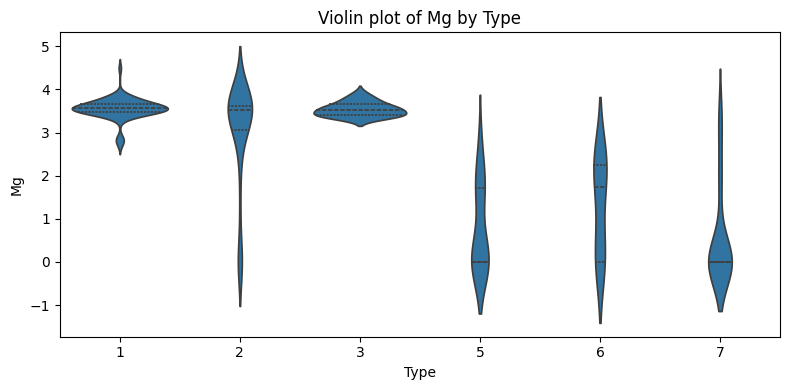

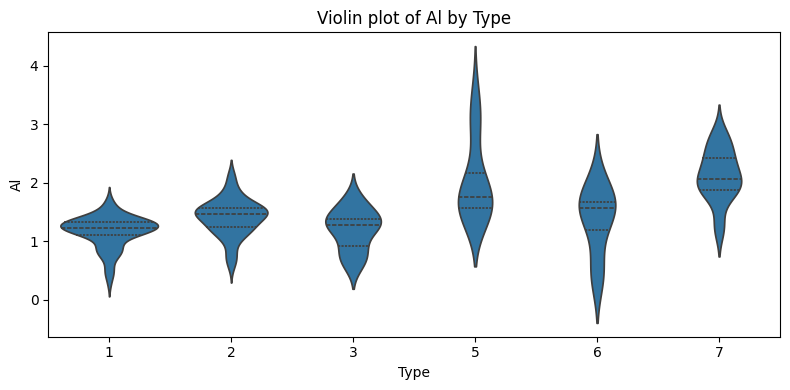

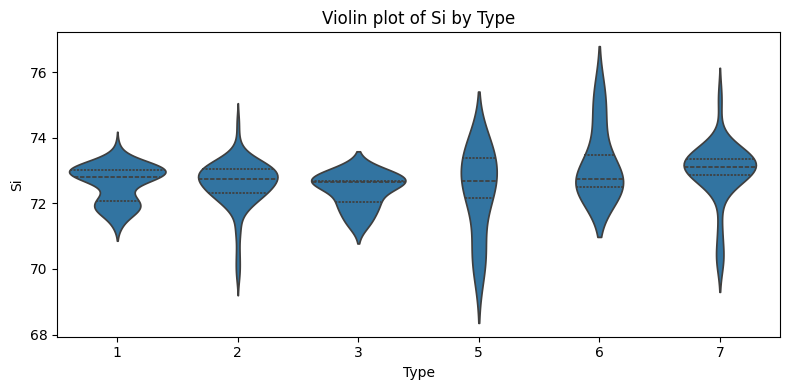

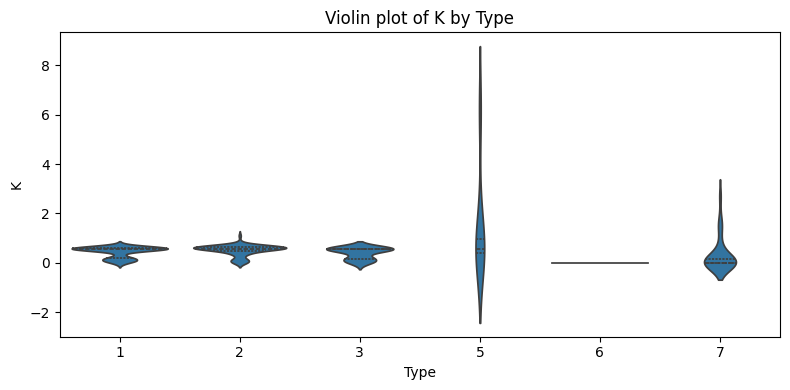

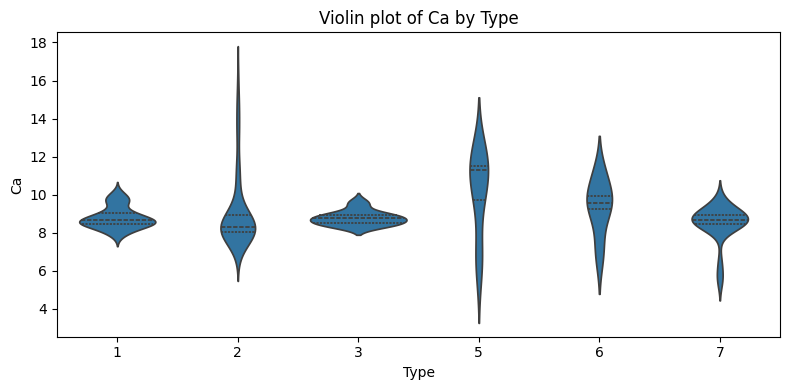

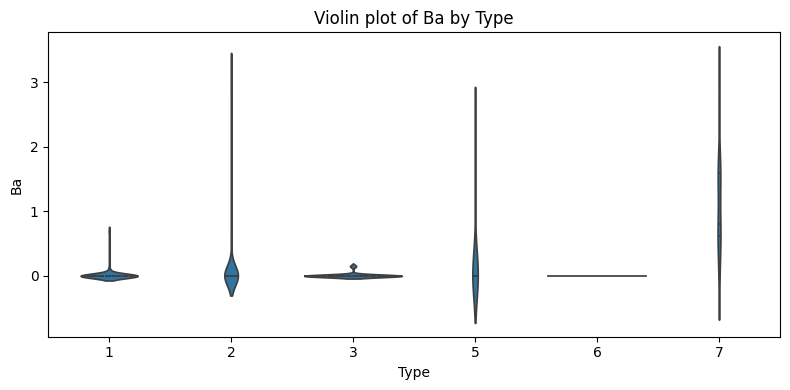

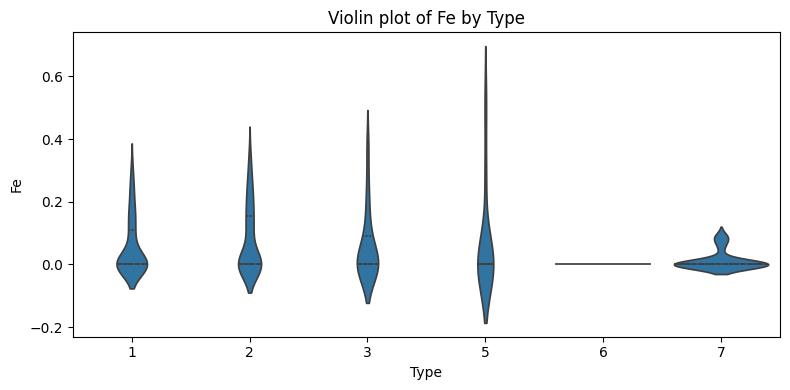

In [18]:
# 4) Violin plots
for col in features:
    plt.figure(figsize=(8,4))
    sns.violinplot(x='Type', y=col, data=glass_data, inner="quartile")
    plt.title(f'Violin plot of {col} by Type')
    plt.xlabel("Type")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

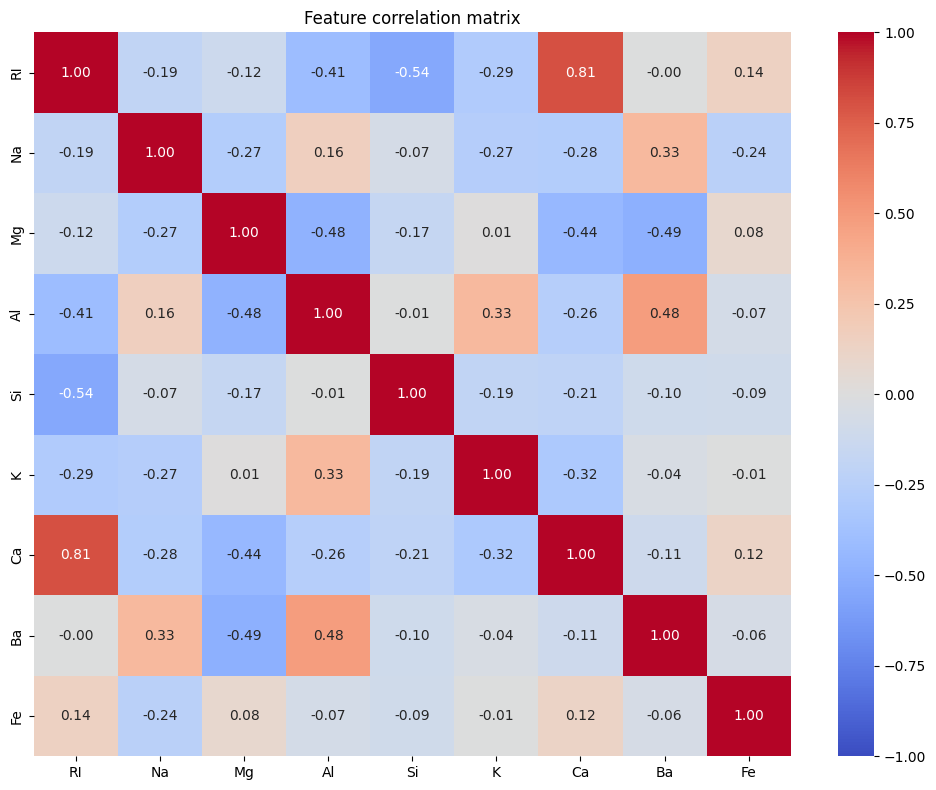

In [19]:

# 6) Correlation heatmap (numerical features)
plt.figure(figsize=(10,8))
corr = glass_data[features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature correlation matrix")
plt.tight_layout()
plt.show()

In [6]:
# Preprocessing
X = glass_data.drop("Type", axis=1)
y = glass_data["Type"]               

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

#  Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== Random Forest Results ===
Accuracy: 0.8307692307692308
Precision: 0.8486813186813187
Recall: 0.8307692307692308
F1 Score: 0.8253058109835603

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.95      0.87        21
           2       0.86      0.78      0.82        23
           3       1.00      0.40      0.57         5
           5       0.60      0.75      0.67         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.83        65
   macro avg       0.83      0.80      0.79        65
weighted avg       0.85      0.83      0.83        65



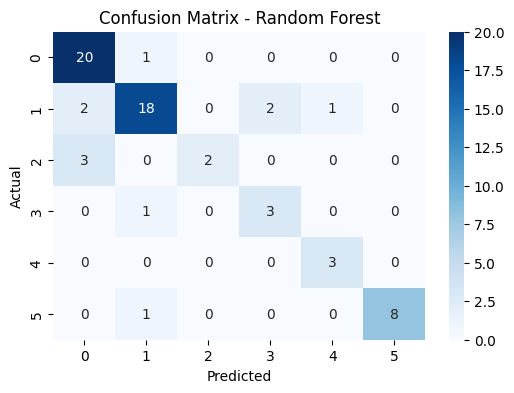

In [7]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
# 6. Bagging
bag = BaggingClassifier(
    estimator=RandomForestClassifier(),
    n_estimators=50,
    random_state=42
)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print("\n=== Bagging Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print("Precision:", precision_score(y_test, y_pred_bag, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_bag, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred_bag, average="weighted"))


=== Bagging Results ===
Accuracy: 0.7846153846153846
Precision: 0.7924601039985656
Recall: 0.7846153846153846
F1 Score: 0.7737251540004982


In [10]:
# 7. Boosting (AdaBoost & GradientBoosting)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("\n=== AdaBoost Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_ada, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred_ada, average="weighted"))

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("\n=== Gradient Boosting Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_gb, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred_gb, average="weighted"))



=== AdaBoost Results ===
Accuracy: 0.5538461538461539
Precision: 0.5395555555555556
Recall: 0.5538461538461539
F1 Score: 0.5412472039876182

=== Gradient Boosting Results ===
Accuracy: 0.8153846153846154
Precision: 0.8332167832167832
Recall: 0.8153846153846154
F1 Score: 0.8053724053724054


In [ ]:
ADDITIONAL NOTES
1.BAGGING:it will train many models in parallel on different random subsets of training data, and combine their outputs for classification,
avg for regression.
each model is independent,it focus on random subsets of variable
reduces variance,work best with unstable models ex: random forest,decision tree
it is fast,avg
2.BOOSTING: it trains model sequentially, each new model focuses on errors of previous model, final prediction is a weighted combination.
models are dependent,it is misclassified units
it is slower,weight some of model
reduces bias, usually achieves higher accuracy but more prone to overfitting.
ex: gradient boosting,xgboost

In [ ]:
HANDLE IMBALANCE IN THE DATA:
the glass dataset is indeed imbalanced,have many samples,cause models tp baised toward majority classes.
data level apporach:this method balance the dataset before training
oversampling
smote creates synthetic data points instead of sample duplicates
over samplying may cause overfitting
ALGORITHM APPORACH:HIGHER TO minority class so model pays more attentation
misclassifying minority class more than majority class
EVALUATIONMETRICS FOR IMBALANCED DATA: accuracy alone can be misleading
precision,recall,f1-score,confusion matrix.